In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 15.6 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import tensorflow_addons as tfa
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from keras.models import load_model
from keras import backend as K


radam = tfa.optimizers.RectifiedAdam()
ranger = tfa.optimizers.Lookahead(radam, sync_period=6, slow_step_size=0.5)

longitud, altura = 150, 150

modelo = ('/content/drive/MyDrive/SIS360/modelo/modelo.h5')
pesos_modelo = ('/content/drive/MyDrive/SIS360/modelo/pesos.h5')

In [ ]:
#funciones para las métricas  que vamos a usar 

def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))


In [ ]:
def prediction(image_name : str, model):
    labels = ['Downy mildew', 'Fresh Leaf', 'Gray mold', 'Leaf scars']
    img = image.load_img(image_name, target_size = (longitud,altura, 3))
    Y = image.img_to_array(img)
    
    X = np.expand_dims(Y, axis=0)
    val = model.predict(X)
    title = labels[np.argmax(val, axis=-1)[0]]
   
    plt.title(title)
    plt.imshow(plt.imread(image_name))

    plt.figure(figsize=(5,5))
    plt.bar(labels, val[0])
    plt.show()
    
    
    

In [ ]:
cnn = load_model(modelo, custom_objects={"f1_m" : f1_m, "recall_m": recall_m, "precision_m": precision_m })

In [ ]:
cnn.load_weights(pesos_modelo)


1/1 [==============================] - 1s 645ms/step


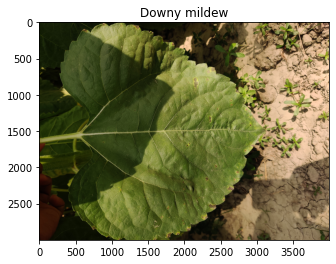

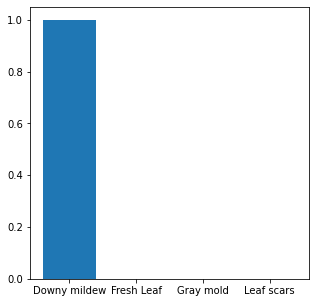

In [ ]:
prediction('/content/drive/MyDrive/SIS360/validacion/Downy mildew/downymildew.  (15).jpg', cnn)


1/1 [==============================] - 0s 318ms/step


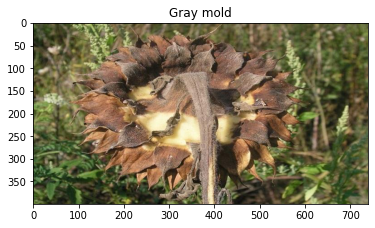

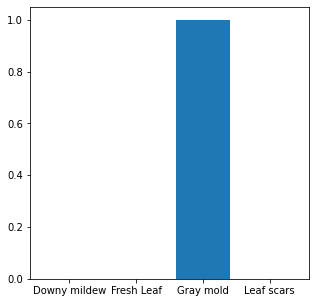

In [ ]:
prediction('/content/drive/MyDrive/prueba_predicciones/gray-mold-of-sunflower.jpg', cnn)

1/1 [==============================] - 1s 861ms/step


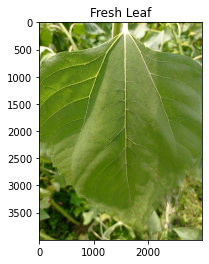

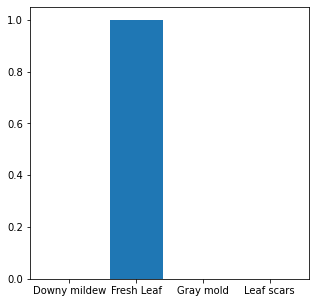

In [ ]:
prediction('/content/drive/MyDrive/SIS360/validacion/Fresh Leaf/fresh. (128).jpg', cnn)

1/1 [==============================] - 0s 306ms/step


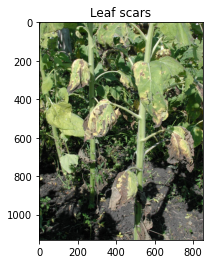

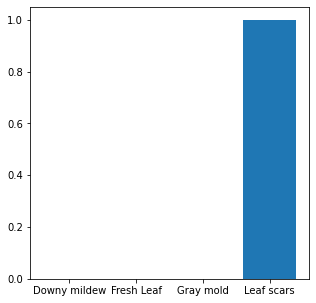

In [ ]:
prediction('/content/drive/MyDrive/SIS360/entrenamiento/Leaf scars/Leaf-wilt-caused-Verticillium-wilt-infection.png', cnn)